In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

data = pd.read_csv("Book1.csv")
data

SN.      Name Sex     Height  Eye_size  Weight Weekday  Temp   Labels
0    1   Pranjal   M        110        10      22  Cloudy  10.0     play
1    2  Shirisha   F        120        12      24  Cloudy  12.0  no_play
2    3       Dip   M        110        20       9   Sunny  30.0     play
3    4   Reebika   F        112        11      10   Sunny  30.0     play
4    5      Anit   M        102       120      12   Sunny  30.0     play
5    5      Anit   M  FGFDSSDFG       120      12   Sunny   NaN     play

In [3]:
labels = data["Labels"]
labels = labels.drop([5])
labels

0       play
1    no_play
2       play
3       play
4       play
Name: Labels, dtype: object

In [4]:
features = data[["SN.","Name", "Sex","Height","Eye_size","Weight", "Weekday", "Temp"]]

In [5]:
features

SN.      Name Sex     Height  Eye_size  Weight Weekday  Temp
0    1   Pranjal   M        110        10      22  Cloudy  10.0
1    2  Shirisha   F        120        12      24  Cloudy  12.0
2    3       Dip   M        110        20       9   Sunny  30.0
3    4   Reebika   F        112        11      10   Sunny  30.0
4    5      Anit   M        102       120      12   Sunny  30.0
5    5      Anit   M  FGFDSSDFG       120      12   Sunny   NaN

In [6]:

if 'Eye' in features["Eye_size"]:
    del features["Eye_size['Eye']"]
    
Eye_size = features["Eye_size"]
Eye_size
data.update(features)
features


SN.      Name Sex     Height  Eye_size  Weight Weekday  Temp
0    1   Pranjal   M        110        10      22  Cloudy  10.0
1    2  Shirisha   F        120        12      24  Cloudy  12.0
2    3       Dip   M        110        20       9   Sunny  30.0
3    4   Reebika   F        112        11      10   Sunny  30.0
4    5      Anit   M        102       120      12   Sunny  30.0
5    5      Anit   M  FGFDSSDFG       120      12   Sunny   NaN

In [7]:
features.isnull() 

SN.   Name    Sex  Height  Eye_size  Weight  Weekday   Temp
0  False  False  False   False     False   False    False  False
1  False  False  False   False     False   False    False  False
2  False  False  False   False     False   False    False  False
3  False  False  False   False     False   False    False  False
4  False  False  False   False     False   False    False  False
5  False  False  False   False     False   False    False   True

In [8]:
mapping = {'FGFDSSDFG': 102}
features = features.replace({'FGFDSSDFG': 102})
features


SN.      Name Sex Height  Eye_size  Weight Weekday  Temp
0    1   Pranjal   M    110        10      22  Cloudy  10.0
1    2  Shirisha   F    120        12      24  Cloudy  12.0
2    3       Dip   M    110        20       9   Sunny  30.0
3    4   Reebika   F    112        11      10   Sunny  30.0
4    5      Anit   M    102       120      12   Sunny  30.0
5    5      Anit   M    102       120      12   Sunny   NaN

In [9]:
features.fillna(method ='pad') 

SN.      Name Sex Height  Eye_size  Weight Weekday  Temp
0    1   Pranjal   M    110        10      22  Cloudy  10.0
1    2  Shirisha   F    120        12      24  Cloudy  12.0
2    3       Dip   M    110        20       9   Sunny  30.0
3    4   Reebika   F    112        11      10   Sunny  30.0
4    5      Anit   M    102       120      12   Sunny  30.0
5    5      Anit   M    102       120      12   Sunny  30.0

In [10]:
newfeatures = features.drop([5])
newfeatures

SN.      Name Sex Height  Eye_size  Weight Weekday  Temp
0    1   Pranjal   M    110        10      22  Cloudy  10.0
1    2  Shirisha   F    120        12      24  Cloudy  12.0
2    3       Dip   M    110        20       9   Sunny  30.0
3    4   Reebika   F    112        11      10   Sunny  30.0
4    5      Anit   M    102       120      12   Sunny  30.0

In [11]:
model = DecisionTreeClassifier()

In [12]:
#newfeatures['Weekday'] = pd.to_numeric(newfeatures['Weekday'], errors='coerce')
#newfeatures['Weekday']
#newfeatures = newfeatures.replace(np.nan, 0, regex=True)
#newfeatures
mapping = {'Cloudy': 0, 'Sunny':1}
newfeatures = newfeatures.replace({'Cloudy': 0, 'Sunny':1})
newfeatures

SN.      Name Sex Height  Eye_size  Weight  Weekday  Temp
0    1   Pranjal   M    110        10      22        0  10.0
1    2  Shirisha   F    120        12      24        0  12.0
2    3       Dip   M    110        20       9        1  30.0
3    4   Reebika   F    112        11      10        1  30.0
4    5      Anit   M    102       120      12        1  30.0

In [13]:
newfeatures2 = newfeatures.set_index('SN.')
newfeatures2


Name Sex Height  Eye_size  Weight  Weekday  Temp
SN.                                                      
1     Pranjal   M    110        10      22        0  10.0
2    Shirisha   F    120        12      24        0  12.0
3         Dip   M    110        20       9        1  30.0
4     Reebika   F    112        11      10        1  30.0
5        Anit   M    102       120      12        1  30.0

In [14]:
newfeatures2["Name"] = pd.to_numeric(newfeatures2["Name"],errors='coerce')
newfeatures2 = newfeatures2.replace(np.nan, 0, regex=True)
newfeatures2["Name"]

SN.
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Name, dtype: float64

In [15]:
#newfeatures2["Sex"] = pd.to_numeric(newfeatures2["Sex"],errors='coerce')
#newfeatures2 = newfeatures2.replace(np.nan, 0, regex=True)
#newfeatures2["Sex"]
mapping = {'M': 0, 'F':1}
newfeatures2 = newfeatures2.replace({'M': 0, 'F':1})
newfeatures2

Name  Sex Height  Eye_size  Weight  Weekday  Temp
SN.                                                   
1     0.0    0    110        10      22        0  10.0
2     0.0    1    120        12      24        0  12.0
3     0.0    0    110        20       9        1  30.0
4     0.0    1    112        11      10        1  30.0
5     0.0    0    102       120      12        1  30.0

In [16]:
newfeatures2

Name  Sex Height  Eye_size  Weight  Weekday  Temp
SN.                                                   
1     0.0    0    110        10      22        0  10.0
2     0.0    1    120        12      24        0  12.0
3     0.0    0    110        20       9        1  30.0
4     0.0    1    112        11      10        1  30.0
5     0.0    0    102       120      12        1  30.0

In [17]:
model.fit(newfeatures2, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
test = np.array([[5, 1, 59, 79, 17.5, 5, 20]])

In [19]:
model.predict(test)

array(['play'], dtype=object)

In [20]:
from sklearn import tree

In [21]:
graph = tree.export_graphviz(model, out_file=None)

In [22]:
print(graph)

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 116.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


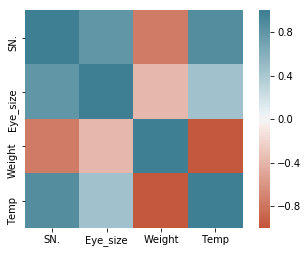

In [23]:
corr = data.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)

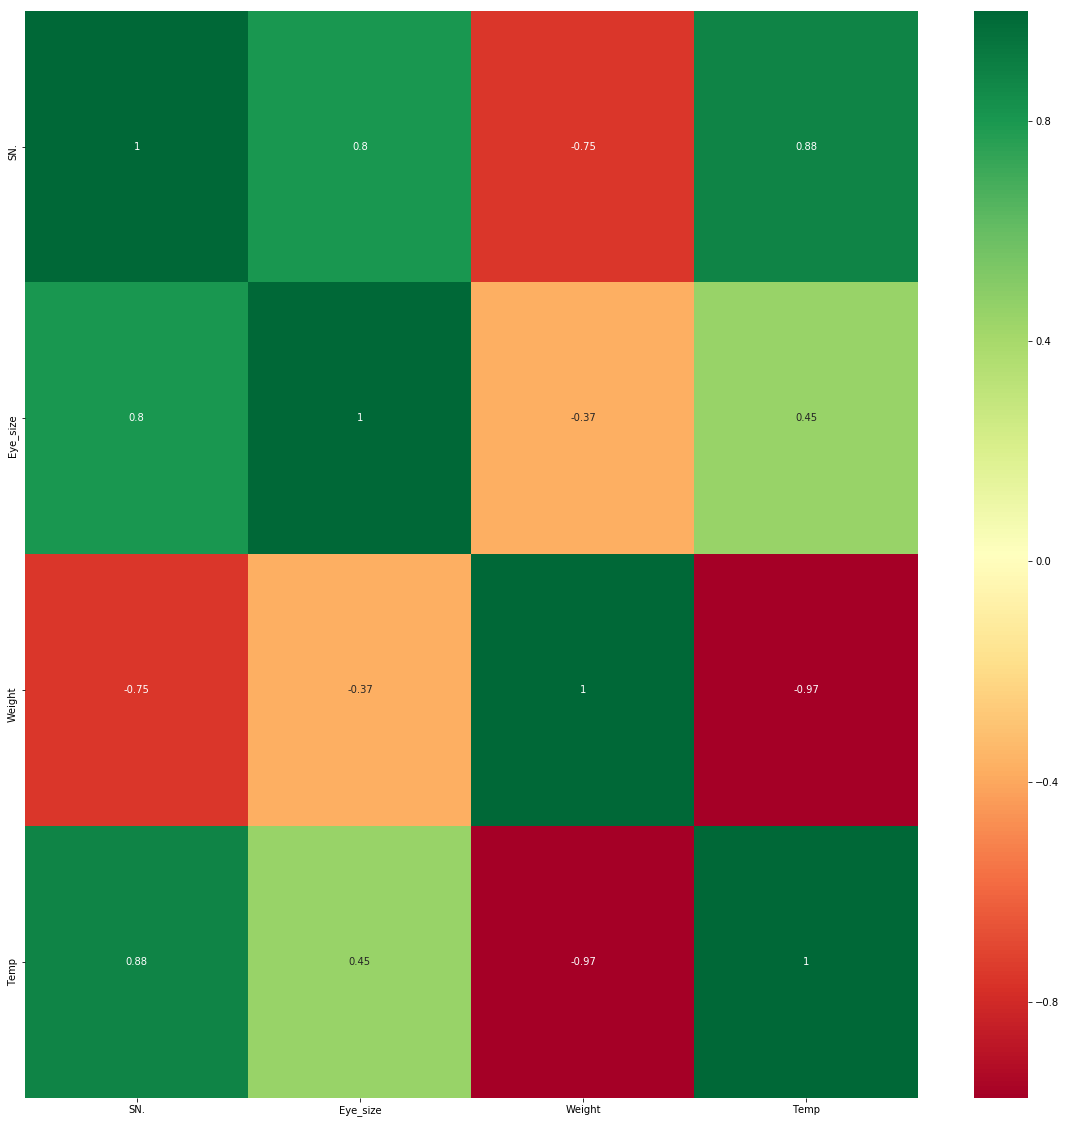

In [24]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g